# Exposición detallada de los tipos de vehículos por cada id

In [1]:
import osmnx as ox
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

Se recupera el modelo detallado.

In [2]:
with open('modelos/ROI_OSMNX.pickle', 'rb') as handle:
    graph = pickle.load(handle)

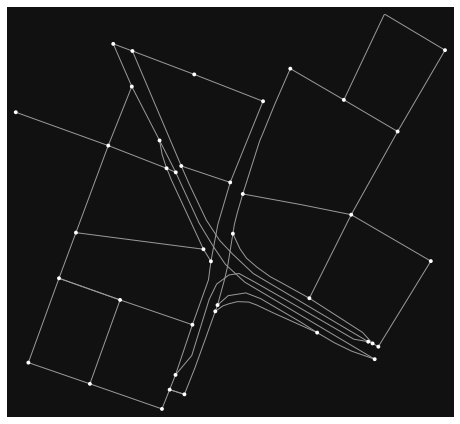

In [3]:
fig, ax = ox.plot_graph(graph)

Los nodos tienen un id que permite identificarlos.

In [7]:
img = plt.imread('./imgs/modelo_detalle.PNG')

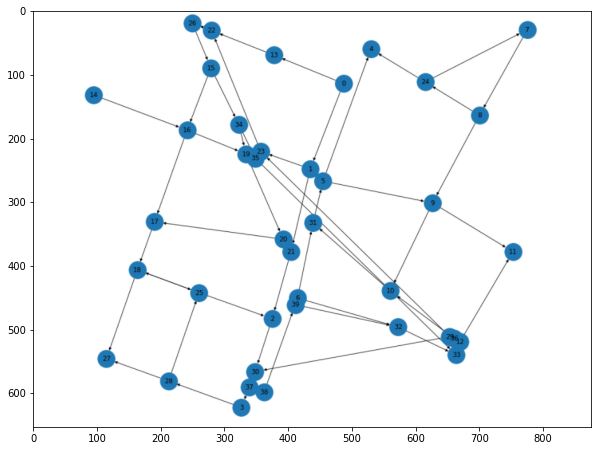

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(img)

Se vuelve a extraer los diccionarios que contienen los ids.

In [15]:
pos = {}
labs_dict = {}
lab2graph = {}
for idx,node in enumerate(graph.nodes):
    pos[node]=(graph.nodes[node]['x'],graph.nodes[node]['y'])
    labs_dict[node]=idx
    lab2graph[idx] = node

## Función de impresión

In [13]:
#mostrará la cantidad de vehículos que existen 
def show_vhq_type(per,graph,nodes,size = (5,5)):
    #no muestra otros nodos
    colors = [0] * len(graph.nodes)
    #colores para cada tipo de vehículo
    route_colors = ['c','r','y','b','g']*10
    #gráfico por cada tipo de vehículo
    for i in range(len(per)):
        print(round(per[i]*100,2),'%')
        fig, ax =ox.plot_graph_route(graph,nodes,
                            node_color = colors,
                            route_linewidth = per[i]*10, #uso de los porcentajes
                            route_color = route_colors[i],
                            figsize=size)

## Zonas de interés por ID

### sur_or_ab

Se extrae los datos del conteo.

In [49]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_ab.csv')

Se obtienen los datos de ligeros, pesados y taxis.

In [50]:
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]

Se generan los porcentajes.

In [51]:
porcentajes = np.array(cantidades)/np.sum(cantidades)
porcentajes 

array([0.66666667, 0.04166667, 0.29166667])

66.67 %


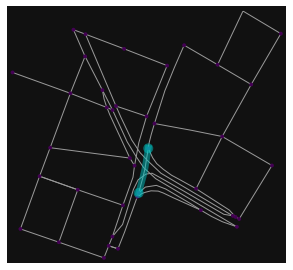

4.17 %


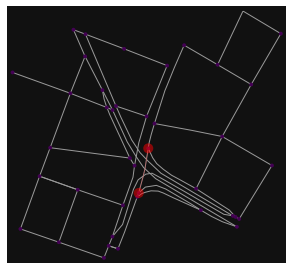

29.17 %


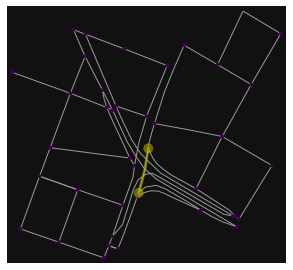

In [52]:
show_vhq_type(porcentajes,graph,[lab2graph[6],lab2graph[31]])


### sur_or_ai

Se repite el procedimiento de extracción.

In [53]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_ai.csv')
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]
porcentajes = np.array(cantidades)/np.sum(cantidades)

Se visualiza la información y se concluye.

37.5 %


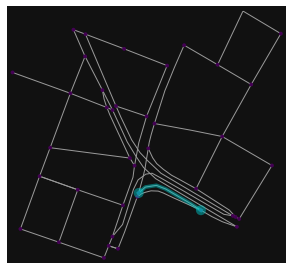

0.0 %


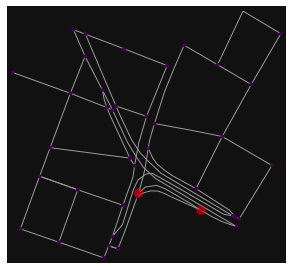

62.5 %


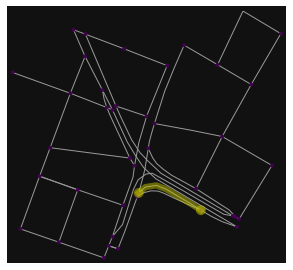

In [54]:
show_vhq_type(porcentajes,graph,[lab2graph[6],lab2graph[32]])

Puede verse una gran cantidad de taxis y prácticamente ningún bus.

### sur_or_id

In [57]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_id.csv')
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]
porcentajes = np.array(cantidades)/np.sum(cantidades)

Al momento de recopilar la información, se utilizó un mismo video para el conteo vehicular en ambas direcciones. Esto se puede volver más específico [modificando las zonas de salida](.), consigueindo el número exacto de vehículos que va en una ruta y no en la otra. En este caso, para mantener la simpleza y ya que se trabaja con porcentajes, se asume que el flujo vehicular en ambas rutas es similar.

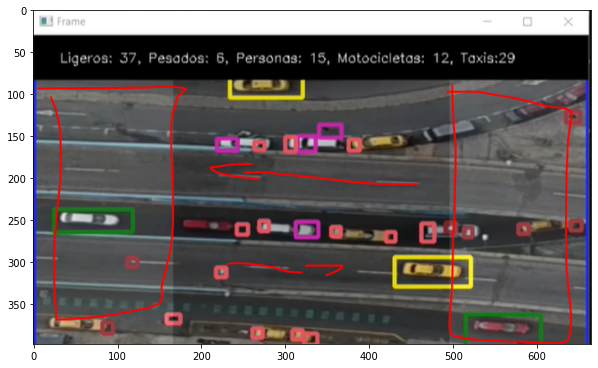

In [4]:
img = plt.imread('./imgs/doble_sentido.PNG')
plt.figure(figsize=(10,10))
plt.imshow(img)

Se modifica la función para observar varias rutas.

In [51]:
#mostrará la cantidad de vehículos que existen 
def show_vhq_type_routes(per,graph,routes,size = (5,5)):
    #no muestra otros nodos
    colors = [0] * len(graph.nodes)
    #colores para cada tipo de vehículo
    route_colors = ['c','r','y','b','g']*10
    
    #gráfico por cada tipo de vehículo
    for i in range(len(per)):
        print(round(per[i]*100,2),'%')
        #se muestran varias rutas    
        fig, ax =ox.plot_graph_routes(graph,routes,
                            node_color = colors,
                            route_linewidth = per[i]*10, #uso de los porcentajes
                            route_colors = [route_colors[i]]*2,
                            figsize=size)
        

Las rutas son pares de nodos que representan los caminos que dene mostrarse.

In [18]:
rutas = [[lab2graph[35],lab2graph[33]],[lab2graph[29],lab2graph[23]]]

50.68 %


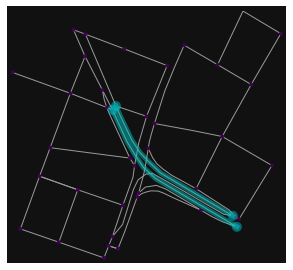

8.22 %


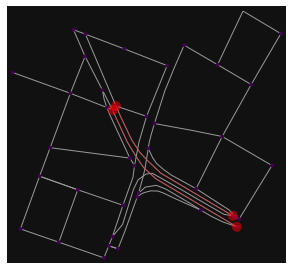

41.1 %


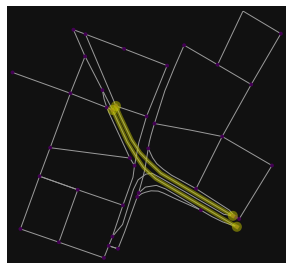

In [48]:
show_vhq_type_routes(porcentajes,graph,rutas)

Sobre el puente se puede ver un flujo equitativo entre autos ligeros y taxis, con muy poca presencia de vehículos pesados.

### nor_oc_ab

Al igual que en el caso anterior, se utilizó un mismo video para ambas direcciones y se asume que el porcentaje vehicular será similar.

In [50]:
data = pd.read_csv('../detector_flujo_urbano/conteo_nor_oc_ab.csv')
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]
porcentajes = np.array(cantidades)/np.sum(cantidades)

Rutas de los nodos involucrados.

In [53]:
rutas = [[lab2graph[31],lab2graph[5]],[lab2graph[1],lab2graph[21]]]

Representación gráfica.

62.5 %


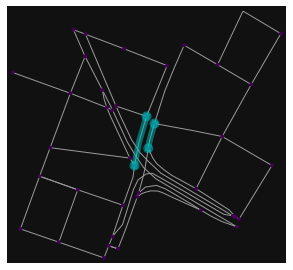

2.08 %


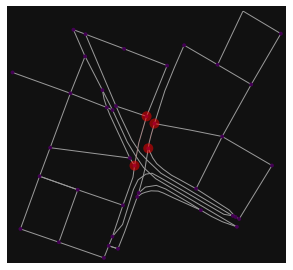

35.42 %


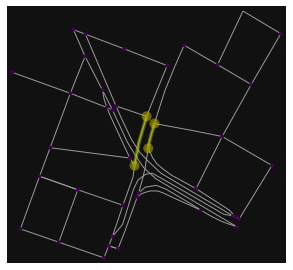

In [54]:
show_vhq_type_routes(porcentajes,graph,rutas)

Se puede observar una mayoría notoria de vehículos ligeros circulando por esta zona.

### nor_oc_d

In [55]:
data = pd.read_csv('../detector_flujo_urbano/conteo_nor_oc_d.csv')
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]
porcentajes = np.array(cantidades)/np.sum(cantidades)

En el caso de este video, recopila la misma información sobre el puente que el id: sur_or_id, pero desde otro punto del mapa. En ambos casos se tomó el flujo de varias rutas, como ya se dijo, se puede ser más específico gracias a las zonas de salida.

In [56]:
rutas = [[lab2graph[35],lab2graph[33]],[lab2graph[29],lab2graph[23]]]

53.19 %


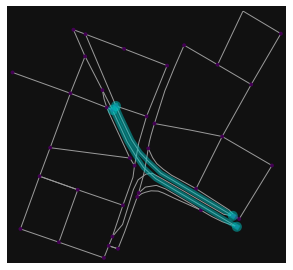

10.64 %


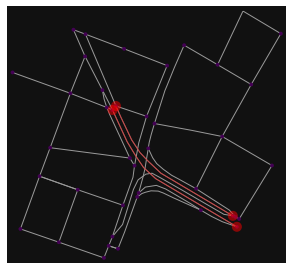

36.17 %


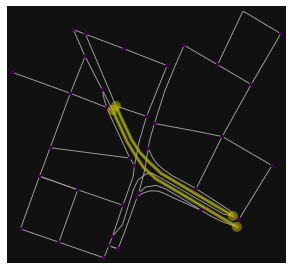

In [57]:
show_vhq_type_routes(porcentajes,graph,rutas)

Se pueden ver porcentajes similares en ambos ids, lo que apoya la hipótesis de que el flujo vehicular está bien estimado. En este caso, puede verse un pequeño incremento el flujo vehicular de autos pesados.

## Complemento

El resto de ids disponibles en este proyecto hacen referencia a zonas ya examindas que pueden ayudar a mejorar la estimación de flujo vehicular ya mostrada en este notebook. El trabajo de realizar una estimación promedio con todos los datos recopilados se hará en el siguiente notebook.